In [73]:
import os
import pandas as pd
import fnmatch

In [74]:
def check_pngs_in_source():
    dir="./gesund"
    filelist=[]
    for root, dirs, files in os.walk(dir):
        for filename in fnmatch.filter(files, '*.png'):
            filelist.append(os.path.join(root, filename))
    return filelist

In [75]:
filelist=check_pngs_in_source()

In [76]:
filelist

['./gesund\\0001_T0046815_T1_DOR\\0000000.png',
 './gesund\\0001_T0046815_T1_DOR\\0000001.png',
 './gesund\\0001_T0046815_T1_DOR\\0000002.png',
 './gesund\\0001_T0046815_T1_DOR\\0000003.png',
 './gesund\\0001_T0046815_T1_DOR\\0000004.png',
 './gesund\\0001_T0046815_T1_DOR\\0000005.png',
 './gesund\\0001_T0046815_T1_DOR\\0000006.png',
 './gesund\\0001_T0046815_T1_DOR\\0000007.png',
 './gesund\\0001_T0046815_T1_DOR\\0000008.png',
 './gesund\\0001_T0046815_T1_DOR\\0000009.png',
 './gesund\\0001_T0046815_T1_DOR\\0000010.png',
 './gesund\\0001_T0046815_T1_DOR\\0000011.png',
 './gesund\\0001_T0046815_T1_DOR\\0000012.png',
 './gesund\\0001_T0046815_T1_DOR\\0000013.png',
 './gesund\\0001_T0046815_T1_DOR\\0000014.png',
 './gesund\\0001_T0046815_T1_DOR\\0000015.png',
 './gesund\\0001_T0046815_T1_DOR\\0000016.png',
 './gesund\\0001_T0046815_T1_DOR\\0000017.png',
 './gesund\\0001_T0046815_T1_DOR\\0000018.png',
 './gesund\\0001_T0046815_T1_DOR\\0000019.png',
 './gesund\\0001_T0046815_T1_DOR\\000002

In [77]:
df=pd.DataFrame(filelist)
df

0
0     ./gesund\0001_T0046815_T1_DOR\0000000.png
1     ./gesund\0001_T0046815_T1_DOR\0000001.png
2     ./gesund\0001_T0046815_T1_DOR\0000002.png
3     ./gesund\0001_T0046815_T1_DOR\0000003.png
4     ./gesund\0001_T0046815_T1_DOR\0000004.png
...                                         ...
2934  ./gesund\0141_T0396250_T2_TRA\0000031.png
2935  ./gesund\0141_T0396250_T2_TRA\0000032.png
2936  ./gesund\0141_T0396250_T2_TRA\0000033.png
2937  ./gesund\0141_T0396250_T2_TRA\0000034.png
2938  ./gesund\0141_T0396250_T2_TRA\0000035.png

[2939 rows x 1 columns]

In [78]:
df['scan']=df[0].str.split('\\',1).str[1]
df['frame']=df['scan'].str.split('\\').str[1]
df['scan']=df['scan'].str.split('\\').str[0]

In [79]:
df

0                  scan  \
0     ./gesund\0001_T0046815_T1_DOR\0000000.png  0001_T0046815_T1_DOR   
1     ./gesund\0001_T0046815_T1_DOR\0000001.png  0001_T0046815_T1_DOR   
2     ./gesund\0001_T0046815_T1_DOR\0000002.png  0001_T0046815_T1_DOR   
3     ./gesund\0001_T0046815_T1_DOR\0000003.png  0001_T0046815_T1_DOR   
4     ./gesund\0001_T0046815_T1_DOR\0000004.png  0001_T0046815_T1_DOR   
...                                         ...                   ...   
2934  ./gesund\0141_T0396250_T2_TRA\0000031.png  0141_T0396250_T2_TRA   
2935  ./gesund\0141_T0396250_T2_TRA\0000032.png  0141_T0396250_T2_TRA   
2936  ./gesund\0141_T0396250_T2_TRA\0000033.png  0141_T0396250_T2_TRA   
2937  ./gesund\0141_T0396250_T2_TRA\0000034.png  0141_T0396250_T2_TRA   
2938  ./gesund\0141_T0396250_T2_TRA\0000035.png  0141_T0396250_T2_TRA   

            frame  
0     0000000.png  
1     0000001.png  
2     0000002.png  
3     0000003.png  
4     0000004.png  
...           ...  
2934  0000031.png  
2935  0000032.png  
2936  0000033.png  
2937  0000034.png  
2938  0000035.png  

[2939 rows x 3 columns]

In [80]:
df['patient']=df['scan'].str.extract(r'(\d{4}_T\d{4,6})')
df['patient']

0       0001_T004681
1       0001_T004681
2       0001_T004681
3       0001_T004681
4       0001_T004681
            ...     
2934    0141_T039625
2935    0141_T039625
2936    0141_T039625
2937    0141_T039625
2938    0141_T039625
Name: patient, Length: 2939, dtype: object

In [81]:
df['scan_art']=df['scan'].str.extract(r'(_T\d{1}.{1,8})\/')
df['scan_art']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2934    NaN
2935    NaN
2936    NaN
2937    NaN
2938    NaN
Name: scan_art, Length: 2939, dtype: object

<AxesSubplot:>

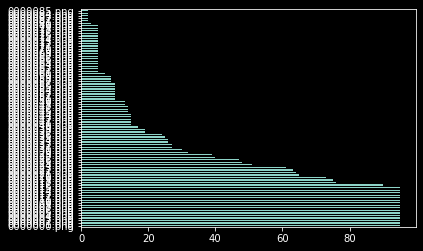

In [82]:
df['frame'].value_counts().sort_index(ascending=True).plot(kind='barh')

In [83]:
value_list=df['frame'].value_counts().sort_index(ascending=True)
value_list

0000000.png    95
0000001.png    95
0000002.png    95
0000003.png    95
0000004.png    95
               ..
0000081.png     2
0000082.png     2
0000083.png     2
0000084.png     2
0000085.png     2
Name: frame, Length: 86, dtype: int64

In [84]:
value_list=value_list[0:27]

In [87]:
relevant_images=value_list.reset_index()
relevant_images=relevant_images['index'].to_list()
relevant_images

['0000000.png',
 '0000001.png',
 '0000002.png',
 '0000003.png',
 '0000004.png',
 '0000005.png',
 '0000006.png',
 '0000007.png',
 '0000008.png',
 '0000009.png',
 '0000010.png',
 '0000011.png',
 '0000012.png',
 '0000013.png',
 '0000014.png',
 '0000015.png',
 '0000016.png',
 '0000017.png',
 '0000018.png',
 '0000019.png',
 '0000020.png',
 '0000021.png',
 '0000022.png',
 '0000023.png',
 '0000024.png',
 '0000025.png',
 '0000026.png']

In [88]:
df

0                  scan  \
0     ./gesund\0001_T0046815_T1_DOR\0000000.png  0001_T0046815_T1_DOR   
1     ./gesund\0001_T0046815_T1_DOR\0000001.png  0001_T0046815_T1_DOR   
2     ./gesund\0001_T0046815_T1_DOR\0000002.png  0001_T0046815_T1_DOR   
3     ./gesund\0001_T0046815_T1_DOR\0000003.png  0001_T0046815_T1_DOR   
4     ./gesund\0001_T0046815_T1_DOR\0000004.png  0001_T0046815_T1_DOR   
...                                         ...                   ...   
2934  ./gesund\0141_T0396250_T2_TRA\0000031.png  0141_T0396250_T2_TRA   
2935  ./gesund\0141_T0396250_T2_TRA\0000032.png  0141_T0396250_T2_TRA   
2936  ./gesund\0141_T0396250_T2_TRA\0000033.png  0141_T0396250_T2_TRA   
2937  ./gesund\0141_T0396250_T2_TRA\0000034.png  0141_T0396250_T2_TRA   
2938  ./gesund\0141_T0396250_T2_TRA\0000035.png  0141_T0396250_T2_TRA   

            frame       patient scan_art  
0     0000000.png  0001_T004681      NaN  
1     0000001.png  0001_T004681      NaN  
2     0000002.png  0001_T004681      NaN  
3     0000003.png  0001_T004681      NaN  
4     0000004.png  0001_T004681      NaN  
...           ...           ...      ...  
2934  0000031.png  0141_T039625      NaN  
2935  0000032.png  0141_T039625      NaN  
2936  0000033.png  0141_T039625      NaN  
2937  0000034.png  0141_T039625      NaN  
2938  0000035.png  0141_T039625      NaN  

[2939 rows x 5 columns]

In [90]:
df=df[df['frame'].isin(relevant_images)].reset_index(drop=True)
df

0                  scan  \
0     ./gesund\0001_T0046815_T1_DOR\0000000.png  0001_T0046815_T1_DOR   
1     ./gesund\0001_T0046815_T1_DOR\0000001.png  0001_T0046815_T1_DOR   
2     ./gesund\0001_T0046815_T1_DOR\0000002.png  0001_T0046815_T1_DOR   
3     ./gesund\0001_T0046815_T1_DOR\0000003.png  0001_T0046815_T1_DOR   
4     ./gesund\0001_T0046815_T1_DOR\0000004.png  0001_T0046815_T1_DOR   
...                                         ...                   ...   
2228  ./gesund\0141_T0396250_T2_TRA\0000022.png  0141_T0396250_T2_TRA   
2229  ./gesund\0141_T0396250_T2_TRA\0000023.png  0141_T0396250_T2_TRA   
2230  ./gesund\0141_T0396250_T2_TRA\0000024.png  0141_T0396250_T2_TRA   
2231  ./gesund\0141_T0396250_T2_TRA\0000025.png  0141_T0396250_T2_TRA   
2232  ./gesund\0141_T0396250_T2_TRA\0000026.png  0141_T0396250_T2_TRA   

            frame       patient scan_art  
0     0000000.png  0001_T004681      NaN  
1     0000001.png  0001_T004681      NaN  
2     0000002.png  0001_T004681      NaN  
3     0000003.png  0001_T004681      NaN  
4     0000004.png  0001_T004681      NaN  
...           ...           ...      ...  
2228  0000022.png  0141_T039625      NaN  
2229  0000023.png  0141_T039625      NaN  
2230  0000024.png  0141_T039625      NaN  
2231  0000025.png  0141_T039625      NaN  
2232  0000026.png  0141_T039625      NaN  

[2233 rows x 5 columns]

<AxesSubplot:>

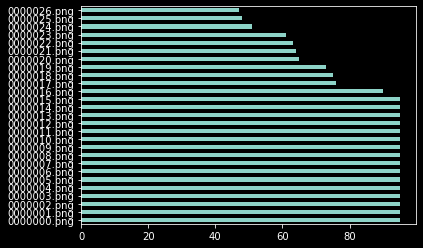

In [91]:
df['frame'].value_counts().sort_index(ascending=True).plot(kind='barh')